# Crab Age Regression Using Deep Learning

In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74051 entries, 0 to 74050
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              74051 non-null  int64  
 1   Sex             74051 non-null  object 
 2   Length          74051 non-null  float64
 3   Diameter        74051 non-null  float64
 4   Height          74051 non-null  float64
 5   Weight          74051 non-null  float64
 6   Shucked Weight  74051 non-null  float64
 7   Viscera Weight  74051 non-null  float64
 8   Shell Weight    74051 non-null  float64
 9   Age             74051 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 5.6+ MB


In [5]:
train = train.drop(['id'], axis=1)

# Exploratory Data Analysis

In [6]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [7]:
sex = train['Sex'].value_counts()
sex = sex.sort_values(ascending=False)

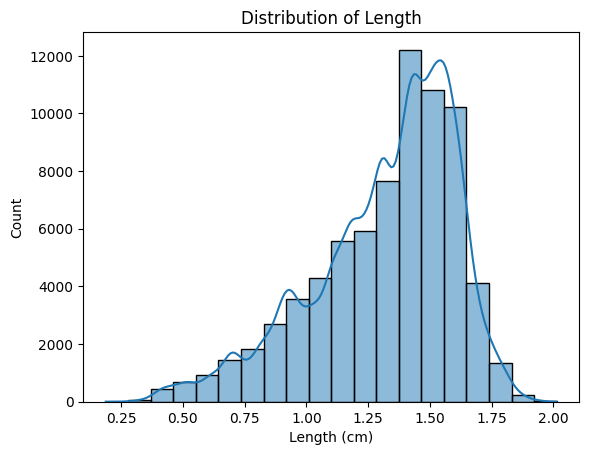

In [8]:
sns.histplot(data=train, x='Length', bins=20, kde=True)
plt.title('Distribution of Length')
plt.xlabel('Length (cm)')
plt.ylabel('Count')
plt.show()

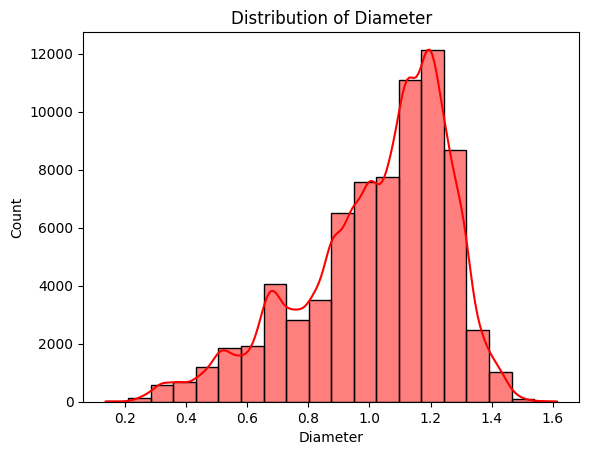

In [9]:
sns.histplot(data=train, x='Diameter', bins=20, kde=True, color='red')
plt.title('Distribution of Diameter')
plt.xlabel('Diameter')
plt.ylabel('Count')
plt.show()

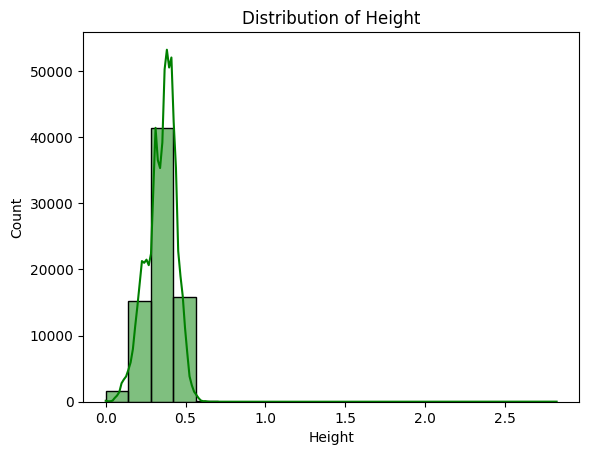

In [10]:
plot = sns.histplot(data=train, x='Height', bins=20, kde=True, color='green')
plt.title('Distribution of Height')
plt.xlabel('Height')
plt.ylabel('Count')
plt.show()

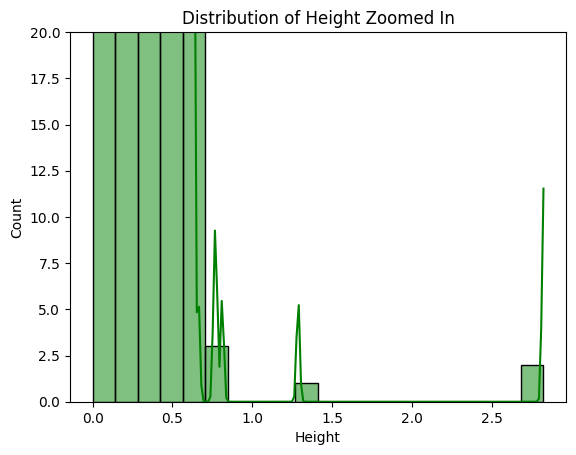

In [11]:
plot = sns.histplot(data=train, x='Height', bins=20, kde=True, color='green')
plot.set_ylim(0, 20)
plt.title('Distribution of Height Zoomed In')
plt.xlabel('Height')
plt.ylabel('Count')
plt.show()

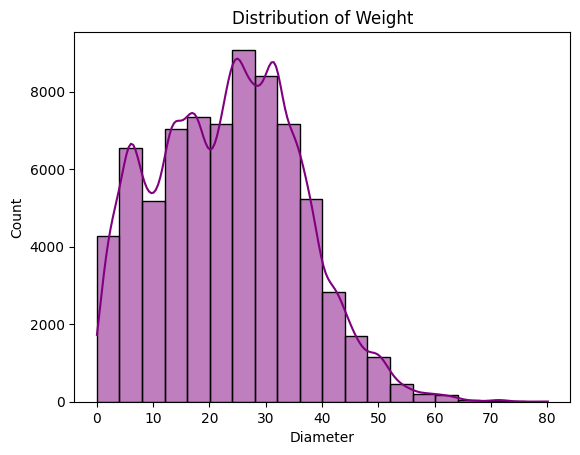

In [12]:
plot = sns.histplot(data=train, x='Weight', bins=20, kde=True, color='purple')
plt.title('Distribution of Weight')
plt.xlabel('Diameter')
plt.ylabel('Count')
plt.show()

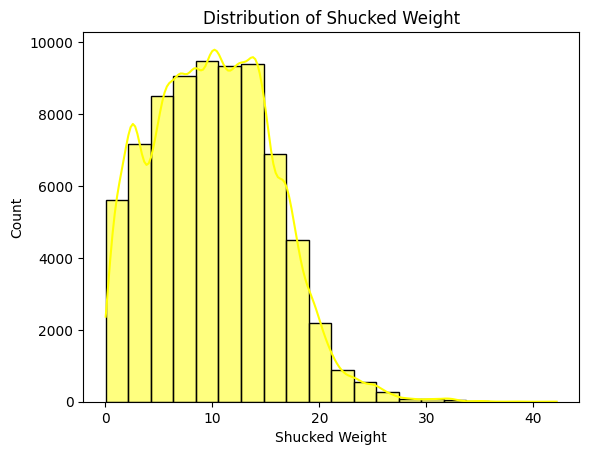

In [13]:
plot = sns.histplot(data=train, x='Shucked Weight', bins=20, kde=True, color='yellow')
plt.title('Distribution of Shucked Weight')
plt.xlabel('Shucked Weight')
plt.ylabel('Count')
plt.show()

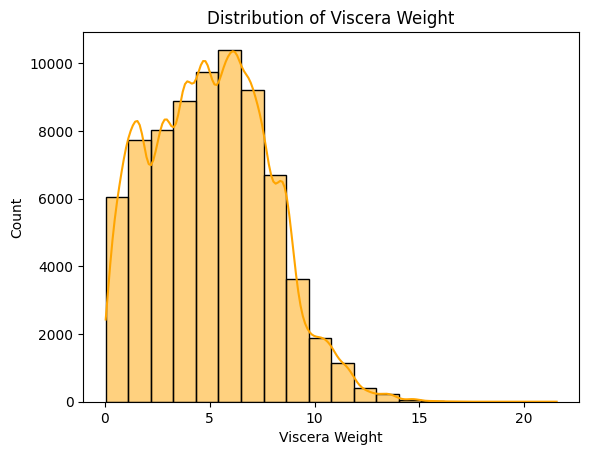

In [14]:
plot = sns.histplot(data=train, x='Viscera Weight', bins=20, kde=True, color='orange')
plt.title('Distribution of Viscera Weight')
plt.xlabel('Viscera Weight')
plt.ylabel('Count')
plt.show()

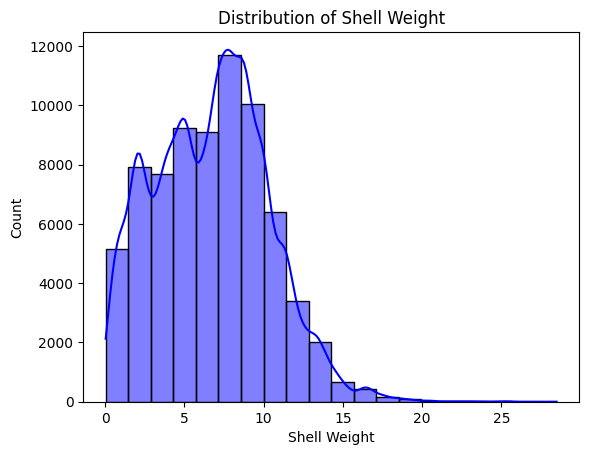

In [15]:
plot = sns.histplot(data=train, x='Shell Weight', bins=20, kde=True, color='blue')
plt.title('Distribution of Shell Weight')
plt.xlabel('Shell Weight')
plt.ylabel('Count')
plt.show()

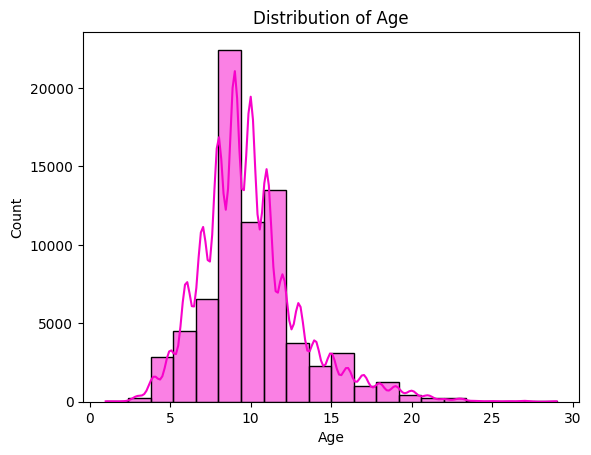

In [16]:
plot = sns.histplot(data=train, x='Age', bins=20, kde=True, color='#f702ca')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Correlation Analysis

<AxesSubplot: >

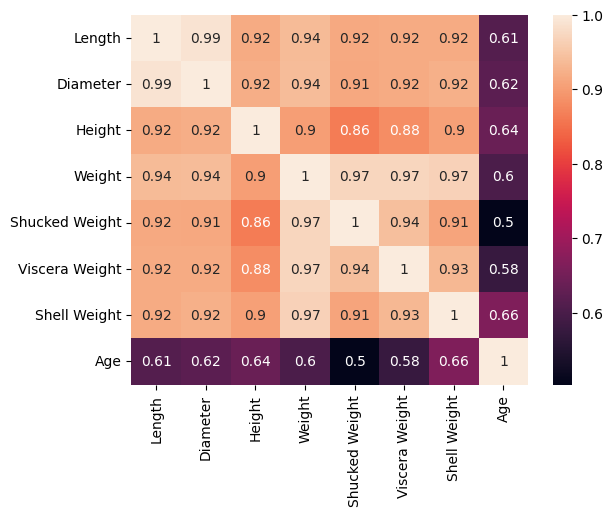

In [17]:
train_num = train.select_dtypes(['int64', 'float64'])
correlation = train_num.corr()

sns.heatmap(correlation, annot=True)

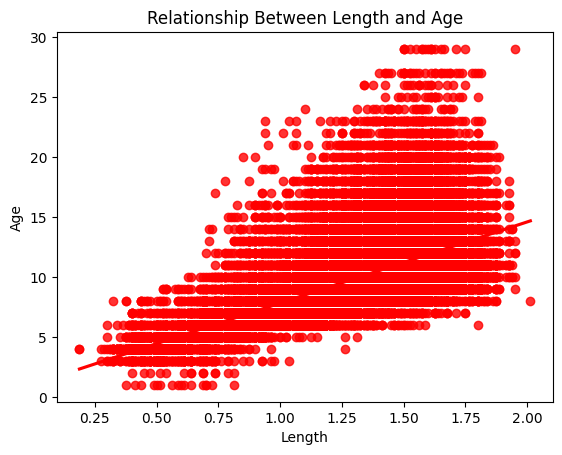

In [18]:
sns.regplot(data=train, x='Length', y='Age', color='red')
plt.title('Relationship Between Length and Age')
plt.show()

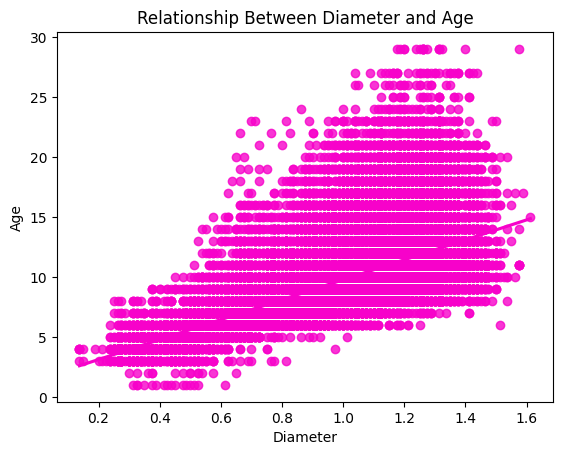

In [19]:
sns.regplot(data=train, x='Diameter', y='Age', color='#f702ca')
plt.title('Relationship Between Diameter and Age')
plt.show()

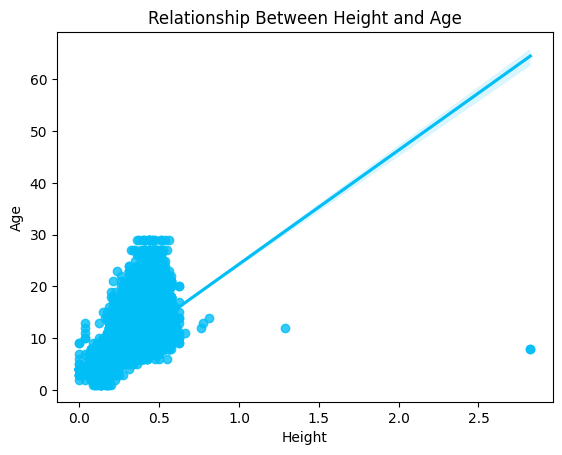

In [20]:
sns.regplot(data=train, x='Height', y='Age', color='#02bef7')
plt.title('Relationship Between Height and Age')
plt.show()

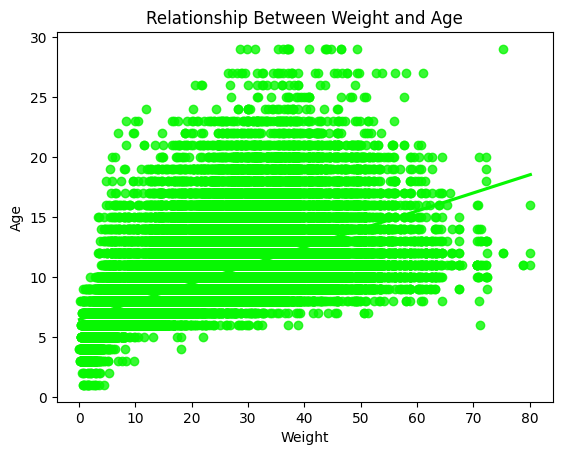

In [21]:
sns.regplot(data=train, x='Weight', y='Age', color='#07f702')
plt.title('Relationship Between Weight and Age')
plt.show()

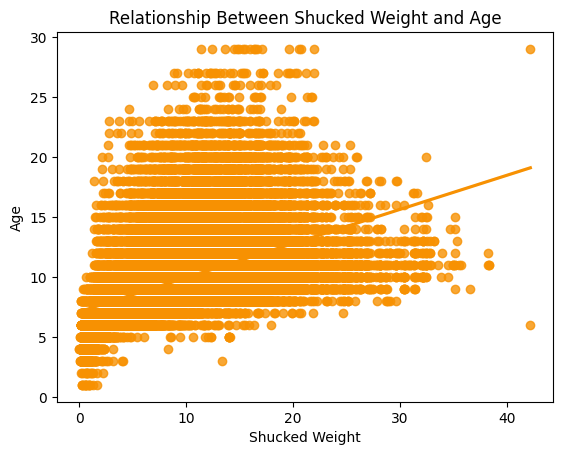

In [22]:
sns.regplot(data=train, x='Shucked Weight', y='Age', color='#f79102')
plt.title('Relationship Between Shucked Weight and Age')
plt.show()

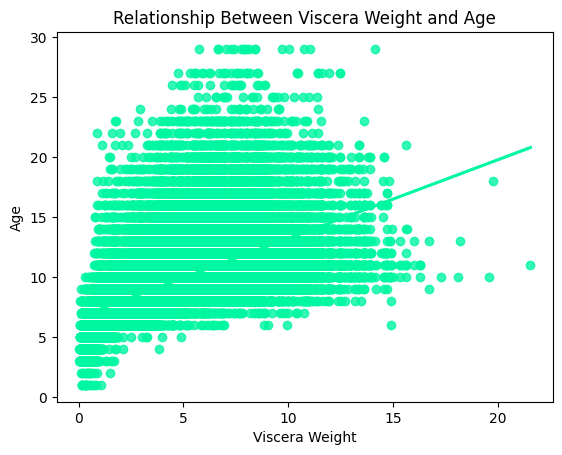

In [23]:
sns.regplot(data=train, x='Viscera Weight', y='Age', color='#00f7a1')
plt.title('Relationship Between Viscera Weight and Age')
plt.show()

# Data Preprocessing and Pipeline

In [24]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [25]:
X = train.drop(['Age'], axis=1)
y = train['Age']

In [26]:
X_train, X_Valid, y_train, y_valid = train_test_split(X, y, random_state=42, test_size=0.1)

In [27]:
class DataPipeline():

    def __init__(self, data, targets=False):
        self.data = data
        self.targets = targets
        self.num_pipeline = make_pipeline(StandardScaler())
        self.cat_pipeline = make_pipeline(OneHotEncoder())

    def transform(self):

        if self.targets == False:
            
            self.num_features = self.data.select_dtypes(['int', 'float']).columns
            self.cat_features = self.data.select_dtypes('object').columns

            pipeline = ColumnTransformer([
                ('num', self.num_pipeline, self.num_features),
                ('cat', self.cat_pipeline, self.cat_features)
            ])

            transformed = pipeline.fit_transform(self.data)

            return tf.convert_to_tensor(transformed)

        else:
            return tf.convert_to_tensor(self.data)

In [28]:
X_train = DataPipeline(X_train).transform()
X_Valid = DataPipeline(X_Valid).transform()

y_train = DataPipeline(y_train, targets=True).transform()
y_valid = DataPipeline(y_valid, targets=True).transform()

In [29]:
test = pd.read_csv('test.csv')

In [30]:
test_predicts = test.drop(['id'], axis=1)
test_ids = test['id']

# Model Selection and Creation

In [31]:
class StopCallback(tf.keras.callbacks.Callback):
    loss_threshold = None

    def __init__(self, threshold):
        self.loss_threshold = threshold

    def on_epoch_end(self, epoch, logs=None):
        if logs.get('val_loss') <= self.loss_threshold:
            self.model.stop_training = True

In [32]:
leaky_relu = tf.keras.layers.LeakyReLU(alpha=0.2)

Model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(10, )),
    tf.keras.layers.Dense(units=1800, activation=leaky_relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=1800, activation=leaky_relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=900, activation=leaky_relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=900, activation=leaky_relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=450, activation=leaky_relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=450, activation=leaky_relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=225, activation=leaky_relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=1, activation=leaky_relu)
])

In [33]:
Model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics=['mean_absolute_error'],
    loss='mean_absolute_error'
)

In [34]:
callback = StopCallback(1.4)

In [35]:
Model.fit(X_train, y_train, validation_data=(X_Valid, y_valid), epochs=1000, batch_size=100, callbacks=[callback])

Epoch 1/1000
667/667 [==============================] - 48s 69ms/step - loss: 1.8904 - mean_absolute_error: 1.8904 - val_loss: 1.4239 - val_mean_absolute_error: 1.4239
Epoch 2/1000
667/667 [==============================] - 46s 69ms/step - loss: 1.5803 - mean_absolute_error: 1.5803 - val_loss: 1.5772 - val_mean_absolute_error: 1.5772
Epoch 3/1000
667/667 [==============================] - 46s 69ms/step - loss: 1.5481 - mean_absolute_error: 1.5481 - val_loss: 1.5306 - val_mean_absolute_error: 1.5306
Epoch 4/1000
667/667 [==============================] - 47s 70ms/step - loss: 1.5252 - mean_absolute_error: 1.5252 - val_loss: 1.4481 - val_mean_absolute_error: 1.4481
Epoch 5/1000
667/667 [==============================] - 49s 73ms/step - loss: 1.5089 - mean_absolute_error: 1.5089 - val_loss: 1.5918 - val_mean_absolute_error: 1.5918
Epoch 6/1000
667/667 [==============================] - 58s 87ms/step - loss: 1.5024 - mean_absolute_error: 1.5024 - val_loss: 1.6665 - val_mean_absolute_error:

In [36]:
test_predicts = DataPipeline(test_predicts).transform()

In [48]:
submission = Model.predict(test_predicts)

1543/1543 [==============================] - 11s 7ms/step


In [49]:
final_df = pd.DataFrame()

final_df['id'] = test_ids
final_df['Age'] = submission

In [52]:
final_df.to_csv('final_df.csv', index=False)

In [53]:
Model.save('CrabAgeNN')

INFO:tensorflow:Assets written to: CrabAgeNN\assets


INFO:tensorflow:Assets written to: CrabAgeNN\assets
